   # Journey to Net Zero: Technology Innovation to support SME’s 

#https://www.data.gov.uk/dataset/723c243d-2f1a-4d27-8b61-cdb93e5b10ff/uk-local-authority-and-regional-greenhouse-gas-emissions/datafile/d2c9d418-622c-45e4-a949-d586545949aa/preview

In [123]:
#python library
import pandas as pd
import numpy as np

#tools from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [124]:
#load dataset
df = pd.read_csv('emission.csv')
df.head()

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2e),Mid-year Population (thousands),Area (km2)
0,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,CH4,0.010737,0.000000,236.47,78.0311
1,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,CO2,0.380289,0.380289,236.47,78.0311
2,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,N2O,0.001710,0.000000,236.47,78.0311
3,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,CH4,0.021121,0.000000,236.47,78.0311
4,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,CO2,0.700438,0.700438,236.47,78.0311


In [125]:
df.shape

(467443, 15)

array([[<Axes: title={'center': 'Calendar Year'}>,
        <Axes: title={'center': 'Territorial emissions (kt CO2e)'}>],
       [<Axes: title={'center': 'CO2 emissions within the scope of influence of LAs (kt CO2e)'}>,
        <Axes: title={'center': 'Mid-year Population (thousands)'}>],
       [<Axes: title={'center': 'Area (km2)'}>, <Axes: >]], dtype=object)

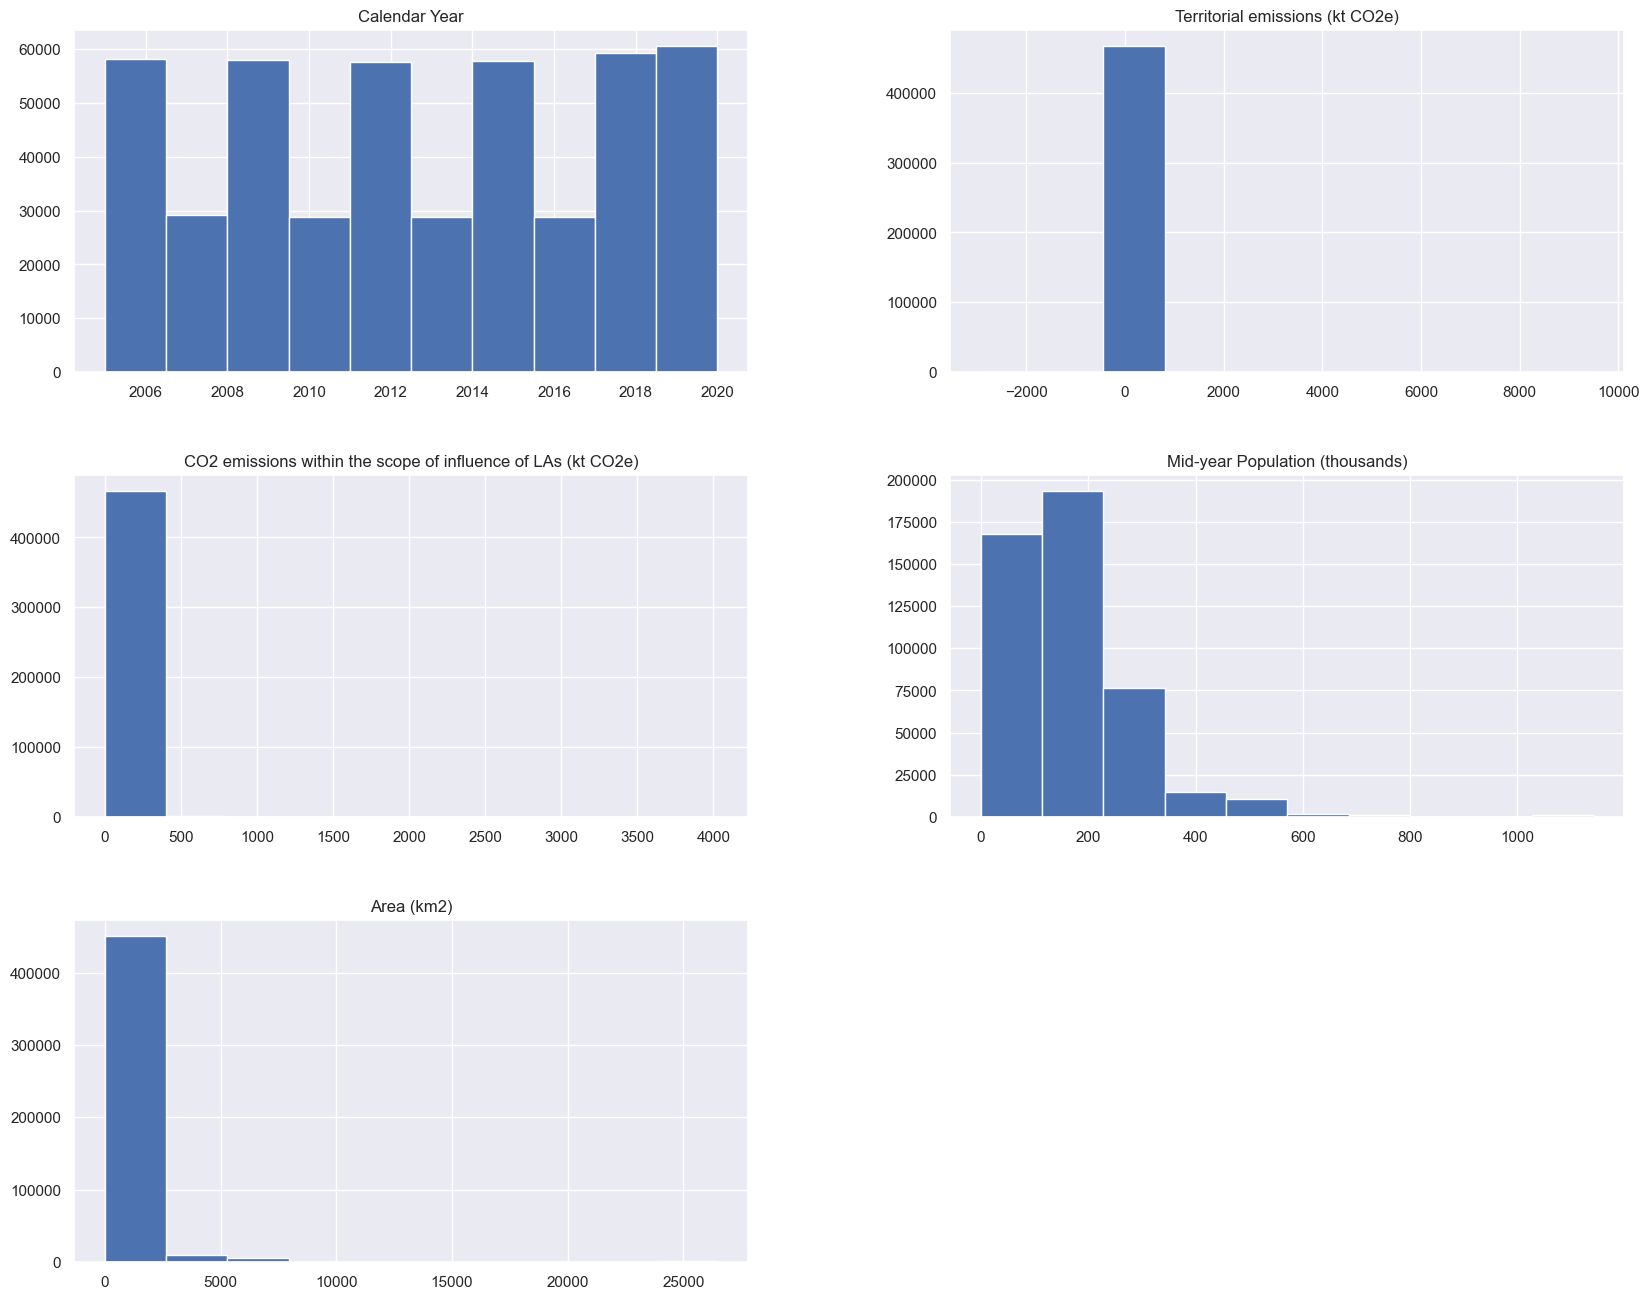

In [126]:
#plotting histograph to understanding data
df.hist(figsize=(20, 16))

In [127]:
df.iloc[:, 10:15].describe()

,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2e),Mid-year Population (thousands),Area (km2)
count,467443.000000,467443.000000,467443.000000,467443.000000
mean,16.029964,12.618935,171.972621,671.648052
std,94.186416,49.969305,116.024952,1654.220436
min,-2920.785256,0.000000,0.000000,0.000000
25%,0.030717,0.000000,99.383000,97.958400
50%,0.472936,0.000000,136.126000,279.042600
75%,3.742259,0.000000,212.137000,680.083400
max,9497.777472,4026.945363,1141.816000,26473.949600


In [128]:
df.iloc[:, 10:15].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467443 entries, 0 to 467442
Data columns (total 5 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   Greenhouse gas                                                467443 non-null  object 
 1   Territorial emissions (kt CO2e)                               467443 non-null  float64
 2   CO2 emissions within the scope of influence of LAs (kt CO2e)  467443 non-null  float64
 3   Mid-year Population (thousands)                               467443 non-null  float64
 4   Area (km2)                                                    467443 non-null  float64
dtypes: float64(4), object(1)
memory usage: 17.8+ MB


In [129]:
df['Greenhouse gas'].value_counts()

Greenhouse gas
N2O    160564
CO2    154339
CH4    152540
Name: count, dtype: int64

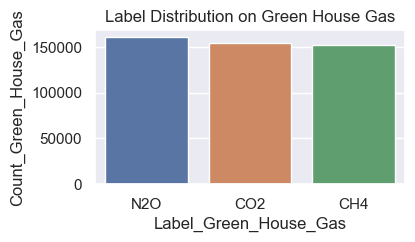

In [130]:
#plotting all Green house gas
numCountg = df['Greenhouse gas'].value_counts()

#set theme
sns.set_theme()
plt.figure(figsize=(4,2))
sns.barplot(x=numCountg.index, y=numCountg.values)

# set plot title and axis labels
plt.xticks()
plt.title('Label Distribution on Green House Gas')
plt.xlabel('Label_Green_House_Gas')
plt.ylabel('Count_Green_House_Gas')

# show plot
plt.show()

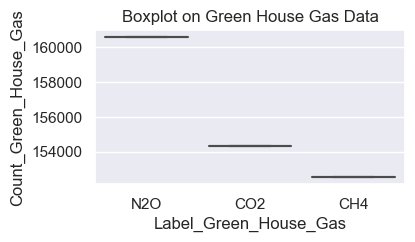

In [131]:
# Create the boxplot
#set theme
#sns.set_theme()
plt.figure(figsize=(4,2))
sns.boxplot(x=numCountg.index, y=numCountg.values)

# Add a title and labels to the axes
# set plot title and axis labels
plt.xticks()
plt.title('Boxplot on Green House Gas Data')
plt.xlabel('Label_Green_House_Gas')
plt.ylabel('Count_Green_House_Gas')

# Display the plot
plt.show()


In [132]:
# Define a function to convert the label to binary classification
def is_emission(label):
    if label == 'N2O':
        return 1
    elif label == 'CO2':
        return 2
    else:
        return 3

# Apply the function to the 'label' column and save the result to a new column 'emission'
df['label'] = df['Greenhouse gas'].apply(is_emission)

df.iloc[:, 11:16]

,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2e),Mid-year Population (thousands),Area (km2),label
0,0.010737,0.000000,236.470,78.0311,3
1,0.380289,0.380289,236.470,78.0311,2
2,0.001710,0.000000,236.470,78.0311,1
3,0.021121,0.000000,236.470,78.0311,3
4,0.700438,0.700438,236.470,78.0311,2
...,...,...,...,...,...
467438,0.107471,0.000000,136.055,503.7739,1
467439,29.169887,0.000000,136.055,503.7739,3
467440,7.526841,0.000000,136.055,503.7739,3
467441,4.985691,4.985691,136.055,503.7739,2


In [133]:
df.iloc[:, 10:15].isnull().sum()

Greenhouse gas                                                  0
Territorial emissions (kt CO2e)                                 0
CO2 emissions within the scope of influence of LAs (kt CO2e)    0
Mid-year Population (thousands)                                 0
Area (km2)                                                      0
dtype: int64

In [134]:
#Label Encoder
le = LabelEncoder()
y = le.fit_transform(df['Greenhouse gas'])
y

array([0, 1, 2, ..., 0, 1, 2])

In [135]:
df.iloc[:, 11:16].corr()

,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2e),Mid-year Population (thousands),Area (km2),label
Territorial emissions (kt CO2e),1.000000,0.524151,0.077538,0.020755,0.009360
CO2 emissions within the scope of influence of LAs (kt CO2e),0.524151,1.000000,0.132619,0.023567,0.005298
Mid-year Population (thousands),0.077538,0.132619,1.000000,0.036944,-0.001098
Area (km2),0.020755,0.023567,0.036944,1.000000,0.002481
label,0.009360,0.005298,-0.001098,0.002481,1.000000


In [138]:
#slicing target variable and data and manual feature selection
X = df.iloc[:, 11:15]
Y = df.iloc[:, 10]

In [139]:
#splitting data into train, test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [140]:
#define model
rf = RandomForestClassifier()

#fit model
rf.fit(Xtrain, ytrain)

#predict against Xtest
pred = rf.predict(Xtest)

#model performance
accuracy_score(pred, ytest)

0.7472215982628972

In [154]:
rf.predict(Xtest[1:2])

array(['CO2'], dtype=object)

In [149]:
#hyperparameter tuning of the model (manual setting)
rfh = RandomForestClassifier(max_depth=10000, n_estimators=200)

#fit hypertuned model
rfh.fit(Xtrain, ytrain)

#predict against Xtest
predh = rfh.predict(Xtest)

#model performance
accuracy_score(predh, ytest)

0.7472429911540395

In [151]:
rfh.predict(Xtest[1:2])

array(['CO2'], dtype=object)